Aim: Your goal is to build a comprehensive multi-model pipeline for your
respective projects. By "comprehensive," I mean you should thoroughly
explore each project and apply all relevant data science techniques to
achieve the best possible outcome.

Used car price prediction: Predict the prices of used cars and evaluate
them on the basis of RMSE.

In [17]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Load the data
train_data = pd.read_csv('C://Users//LENOVO//Desktop//ProfCess//cars//train1.csv')
test_data = pd.read_csv('C://Users//LENOVO//Desktop//ProfCess//cars//test.csv')

In [19]:
# Display the first few rows of each dataset
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                      

In [20]:
# Display basic information
print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 

In [21]:
# Check for missing values in the training data
print("\nMissing values in train data:")
print(train_data.isnull().sum())


Missing values in train data:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [22]:
# Splitting features and target variable
X = train_data.drop("price", axis=1)  # Assuming "price" is the target column
y = train_data["price"]

In [23]:
# Splitting train data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Separate numerical and categorical columns
num_features = X.select_dtypes(include=['int64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [25]:
# Preprocessing pipeline for numerical and categorical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [26]:
# Create a full pipeline with preprocessor and model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [27]:
# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'model_year',
                                                   'milage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'fuel_type', 'engine',
                                                   'transmission', 'ext_col',
                                                   'int_col', 'accident',
                                                   'clean_title'])])),
                ('regressor', LinearRegression())])

In [28]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [29]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 69311.72855008877


In [30]:
# Predictions on the test data
test_predictions = model.predict(test_data)

In [31]:
# Display predictions in the terminal
print("\nPredicted prices for the test set:")
print(test_predictions)


Predicted prices for the test set:
[23388.79369899 70902.89638104 56207.92859444 ... 21692.92087868
 14532.62506552 46331.83363325]


VISUALIZE

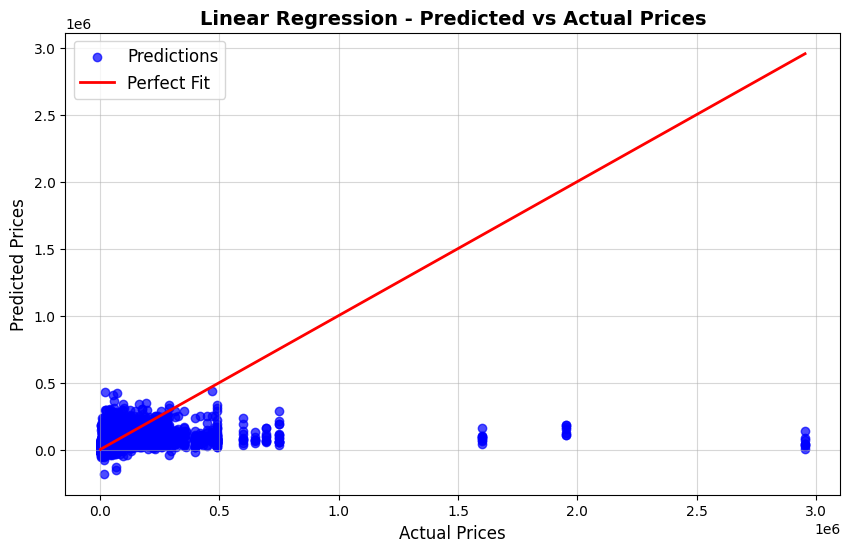

In [32]:
# Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='blue', label='Predictions')  # Added color and label
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linewidth=2, label='Perfect Fit')  # Added label for the perfect fit line
plt.title('Linear Regression - Predicted vs Actual Prices', fontsize=14, fontweight='bold')  # Enhanced title
plt.xlabel('Actual Prices', fontsize=12)  # Enhanced x-axis label
plt.ylabel('Predicted Prices', fontsize=12)  # Enhanced y-axis label
plt.legend(fontsize=12)  # Added legend with font size
plt.grid(alpha=0.5)  # Lighter grid for better aesthetics
plt.show()
